In [1]:
import openpharmacophore as oph

# Protein-ligand complex pharmacophore

We obtain pharmacophores from a md trajectory of er-alpha that consists of three frames

In [2]:
protein = oph.load("../data/eralpha_small.h5")
lig_ids = protein.ligand_ids()
print(lig_ids)

[':B']


/home/daniel/miniconda3/envs/oph/lib/python3.7/site-packages/mdtraj/core/trajectory.py:438: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


Note that the trajectory does not contain info of the ligand names, so it's name appears to be empty. But we
can still extract the pharmacophore.

The receptor already contains hydrogens so we don't need to add any to obtain hydrogen bond acceptor and donor pharmacophoric points

In [3]:
protein.has_hydrogens

<bound method Protein.has_hydrogens of <openpharmacophore.molecular_systems.protein.Protein object at 0x7f7e7b92ce10>>

We extract the pharmacophore. We need the smiles of the ligand because its name is not present in the trajectory.

[13:43:10] WARNING: More than one matching pattern found - picking one



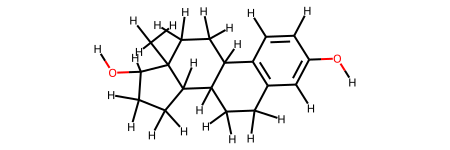

In [4]:
ligand = protein.get_ligand(lig_ids[0], remove_hyd=False)
ligand.fix_bond_order(
    smiles="C[C@]12CC[C@@H]3c4ccc(cc4CC[C@H]3[C@@H]1CC[C@@H]2O)O"
)
ligand.draw()

In [5]:
protein.remove_ligand(lig_ids[0])
print(f"Has ligand: {protein.has_ligands}")

Has ligand: <bound method Protein.has_ligands of <openpharmacophore.molecular_systems.protein.Protein object at 0x7f7e7b92ce10>>


In [6]:
bsite = oph.ComplexBindingSite(protein, ligand)

In [7]:
pharmacophore = oph.LigandReceptorPharmacophore(bsite, ligand)
pharmacophore.extract(frames=range(3))

In [8]:
for ii, ph in enumerate(pharmacophore):
    print(f"Pharmacophore for frame {ii + 1} has {len(ph)} points")
    for point in ph:
        print(point)
    print("\n\n")

Pharmacophore for frame 1 has 5 points
PharmacophoricPoint(feat_type=aromatic ring; center=(30.85, 16.55, 24.52); radius=1.0; direction=(0.01, 0.55, -0.84))
PharmacophoricPoint(feat_type=hb donor; center=(28.34, 17.74, 25.08); radius=1.0; direction=(0.29, 0.57, 0.77))
PharmacophoricPoint(feat_type=hb donor; center=(37.77, 12.08, 23.03); radius=1.0; direction=(-0.32, -0.95, -0.05))
PharmacophoricPoint(feat_type=hb acceptor; center=(37.77, 12.08, 23.03); radius=1.0; direction=(0.65, -0.36, -0.67))
PharmacophoricPoint(feat_type=hydrophobicity; center=(35.22, 12.2, 24.12); radius=1.0)



Pharmacophore for frame 2 has 4 points
PharmacophoricPoint(feat_type=aromatic ring; center=(29.12, 19.02, 22.58); radius=1.0; direction=(0.39, 0.49, -0.78))
PharmacophoricPoint(feat_type=hb donor; center=(26.49, 19.81, 22.45); radius=1.0; direction=(-0.19, 0.93, 0.31))
PharmacophoricPoint(feat_type=hb acceptor; center=(36.18, 15.29, 24.48); radius=1.0; direction=(0.65, -0.69, -0.31))
PharmacophoricPoint(fe

In [9]:
viewer = oph.Viewer()
viewer.add_components([protein, ligand, pharmacophore])
viewer.show(struct=0)

NGLWidget()

<img src="../../../_static/er_alpha_md_1.png" alt="pharmacophore">

In [10]:
viewer.show(struct=2)

NGLWidget()

<img src="../../../_static/er_alpha_md_2.png" alt="pharmacophore">

<div class="alert alert-info">
    <strong>Note:</strong>
    <p>viewer.show() displays an interactive widget. For simplicity an image is presented in the documentation.</p>
</div>

<strong>Visualize with interactive view</strong>

We create an interactive widget to visualize the different pharmacophores obtained from the trajectory.

In [11]:
from ipywidgets import interact, fixed, IntSlider

In [12]:
def view_frame(frame):
    """ Return a view of the pharmacophore at the given frame."""
    viewer = oph.Viewer()
    viewer.add_components([protein, ligand, pharmacophore])
    return viewer.show(frame=frame)


def interactive_view(pharma):
    """ Returns a view of the pharmacophore with a slider to select
        the desired frame.
    """
    slider = IntSlider(min=0, max=len(pharmacophore) - 1, step=1, value=0)
    interact(view_frame, pharma=fixed(pharma), frame=slider)

In [13]:
execute = False
if execute:
    interactive_view(pharmacophore)

In [14]:
# Save pharmacophore image so it can be viewed in the documentation
 
import time
import threading

save = False

def save_image(view):
    im = view.render_image()
    while not im.value:
        time.sleep(0.1)
    save_path = "../../../_static/er_alpha_md_2.png"
    with open(save_path, "wb") as fp:
        fp.write(im.value)    

def generate_image():
    thread = threading.Thread(target=save_image, args=(viewer.to_nglview(),), daemon=True)
    thread.start()
    

if save:
    generate_image()